In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
print("numpy.version.version = ",np.version.version)
import time
import torch
import pandas as pd
import torch.nn as nn 
import torch.nn.functional as F
import numpy.ma as ma


numpy.version.version =  1.23.5


In [2]:
import matplotlib as mpl
mpl.style.use('classic')

In [3]:
from utils import *

## Summary

### Steps involved in the task here:



1. **Model Conversion**: I first defined the Python model class `PythonModel` to mimic the architecture of the given PyTorch model. It has methods for `linear`, `leaky_relu`, `softplus` functions, and a `forward` method to perform the forward propagation.

2. **Error Debugging**: During this process, I encountered runtime warnings and errors (e.g., RuntimeWarning: overflow encountered in exp, AttributeError: 'numpy.ndarray' object has no attribute 'cpu'). Solutions were implemented, which include a more sophisticated approach to handle potential overflow in exponential calculations known as the "log-sum-exp trick", and removing unnecessary conversion to PyTorch Tensor.

3. **Data Transformation**: Modification and careful data handling were performed in the forward method according to the dimensions of the input data to avoid the `ValueError during dimension swapping

4. Testing the Model: The Python model was tested for one event, and successfully produced outputs that match the outputs from the PyTorch model.

5. Mass Testing and Visualization: The process was repeated for multiple events. Differences of outputs from both models are showcased through plots for each event. 

6. Performance: It was noted that the Python model took significant computation time for a single event. I still need to fix the GPU running. potentially I need to use another conda environment (currently I'm using `april2023ME`)

    



In [4]:

# Define the path
path = "/share/lazy/sokoloff/ML/20June2023_VScode_HalfDozen_iter2_500epochs_2em5/20June2023_VScode_HalfDozen_iter2_500epochs_2em5_final.pyt"

# Load the PyTorch model weights
model_weights = torch.load(path, map_location=torch.device('cpu'))

# Initialize dictionaries to store weights and biases as NumPy arrays
weights = {}
biases = {}

# Iterate through the layers and extract weights and biases
for i in range(1, 7):  # Since there are six layers
    weight_key = f"layer{i}.weight"
    bias_key = f"layer{i}.bias"
    
    weights[weight_key] = model_weights[weight_key].numpy() # Convert weight to numpy
    biases[bias_key] = model_weights[bias_key].numpy() # Convert bias to numpy

# Now, 'weights' and 'biases' dictionaries contain the NumPy arrays for each layer

# Now lets print the weights contents



In [5]:
for name, param in model_weights.items():
    print(f"{name}: {param.shape}")

layer1.weight: torch.Size([20, 9])
layer1.bias: torch.Size([20])
layer2.weight: torch.Size([20, 20])
layer2.bias: torch.Size([20])
layer3.weight: torch.Size([20, 20])
layer3.bias: torch.Size([20])
layer4.weight: torch.Size([20, 20])
layer4.bias: torch.Size([20])
layer5.weight: torch.Size([20, 20])
layer5.bias: torch.Size([20])
layer6.weight: torch.Size([100, 20])
layer6.bias: torch.Size([100])


In [6]:
if isinstance(model_weights, dict):
    for key, value in model_weights.items():
        print(f"Key: {key}, Type: {type(value)}")

Key: layer1.weight, Type: <class 'torch.Tensor'>
Key: layer1.bias, Type: <class 'torch.Tensor'>
Key: layer2.weight, Type: <class 'torch.Tensor'>
Key: layer2.bias, Type: <class 'torch.Tensor'>
Key: layer3.weight, Type: <class 'torch.Tensor'>
Key: layer3.bias, Type: <class 'torch.Tensor'>
Key: layer4.weight, Type: <class 'torch.Tensor'>
Key: layer4.bias, Type: <class 'torch.Tensor'>
Key: layer5.weight, Type: <class 'torch.Tensor'>
Key: layer5.bias, Type: <class 'torch.Tensor'>
Key: layer6.weight, Type: <class 'torch.Tensor'>
Key: layer6.bias, Type: <class 'torch.Tensor'>


In [7]:
# lets print the contents and biases
print("Contents of weights", weights)

# print the type of weights
print("Type of weights", type(weights)) 


Contents of weights {'layer1.weight': array([[-2.39243770e+00,  1.30464256e-01,  1.44157395e-01,
         1.71235248e-01, -6.68831840e-02,  1.03701308e-01,
        -2.84958005e-01,  1.00540891e-01,  1.80479631e-01],
       [ 1.84944880e+00,  3.07485819e-01, -2.34383360e-01,
        -1.91112101e-01,  2.98105180e-01,  2.92919755e-01,
        -5.14408171e-01, -3.32461506e-01, -4.81371015e-01],
       [ 2.15168047e+00, -2.79530555e-01, -2.55684108e-01,
        -1.94404364e-01, -5.53289950e-02,  5.55641472e-01,
        -1.05672434e-01, -1.46211654e-01, -7.12540448e-02],
       [-2.22414446e+00, -2.92026907e-01,  1.60329551e-01,
         1.94396615e-01, -8.36265162e-02,  1.41628847e-01,
         1.87526956e-01, -1.66784525e-01, -1.05290124e-02],
       [-1.53005838e+00, -7.75448859e-01,  7.34186411e-01,
         4.24013436e-02, -2.11835980e-01,  2.56287932e-01,
        -3.12074631e-01,  9.02302447e-04, -8.21567774e-02],
       [ 1.45638084e+00,  4.93726432e-02, -1.07808830e-02,
         3.33

In [8]:
# print the biases
print("Contents of biases", biases)

# print the type of biases
print("Type of biases", type(biases))

Contents of biases {'layer1.bias': array([ 0.04636296,  0.07087298,  0.09952483,  0.16813691, -0.01027745,
        0.00601871,  0.10466313, -0.03878294, -0.03412374, -0.04446378,
        0.0375012 ,  0.07540643, -0.04229179,  0.04900113,  0.04046827,
        0.1247687 , -0.09866881,  0.01831979, -0.0072919 ,  0.11979998],
      dtype=float32), 'layer2.bias': array([ 9.18925926e-02,  4.75965515e-02, -7.44393170e-02,  1.09209247e-01,
        7.97329172e-02,  9.62207913e-02, -6.35594651e-02, -5.26137919e-05,
        1.09212168e-01,  1.01869345e-01, -4.18414772e-02, -2.08854020e-01,
        5.63462228e-02,  1.22719459e-01,  6.98987246e-02,  6.01098910e-02,
       -2.03451201e-01, -6.19641840e-02,  1.36885509e-01, -8.44655111e-02],
      dtype=float32), 'layer3.bias': array([ 0.21427123, -0.11512637,  0.24895187,  0.2627717 ,  0.10461821,
        0.2411575 ,  0.02609242,  0.10108724,  0.17866327,  0.28909   ,
        0.1190748 , -0.08345667,  0.0930144 ,  0.05306726, -0.10638557,
       -0.

## Model

In [9]:

class PythonModel:
    def __init__(self, weights, nOut1=25, nOut2=25, nOut3=25, nOut4=25, nOut5=25):
        # Store the weights
        self.weights = weights
        self.nOut1 = nOut1
        self.nOut2 = nOut2
        self.nOut3 = nOut3
        self.nOut4 = nOut4
        self.nOut5 = nOut5

    def linear(self, x, layer):
        # Get the weights (W) and biases (b) for the specified layer
        weight = self.weights[f'layer{layer}.weight'].numpy()
        bias = self.weights[f'layer{layer}.bias'].numpy()
        # Compute the linear step of the neural network (perform the linear transformation)
        return np.dot(x, weight.T) + bias # Equivalent to: x @ W + b

    def leaky_relu(self, x, negative_slope=0.01):
        # Compute the leaky ReLU activation function
        return np.maximum(0, x) + negative_slope * np.minimum(0, x) # Equivalent to: max(0, x) + negative_slope * min(0, x)

    def softplus(self, x):
        # Compute the leaky ReLU activation function
        # Use the log-sum-exp trick to avoid overflow
        b = np.max(x)
        return b + np.log(np.exp(x - b) + np.exp(0 - b)) # Equivalent to: b + log(exp(x - b) + exp(0 - b))
    
    def forward(self, x):
        # Reshape the input data if necessary
        if len(x.shape) == 3:
            x = x.transpose(0, 2, 1)
        # Compute the linear step    
        x = self.leaky_relu(self.linear(x, 1))
        x = self.leaky_relu(self.linear(x, 2))
        x = self.leaky_relu(self.linear(x, 3))
        x = self.leaky_relu(self.linear(x, 4))
        x = self.leaky_relu(self.linear(x, 5))
        # Compute the softplus step
        x = self.softplus(self.linear(x, 6))
        # Reshape the output
        x = x.reshape(x.shape[0], -1, 100)
        # Sum across the first dimension
        y_pred = np.sum(x, axis=1) * 0.001
        # Return the predicted y values
        return y_pred


### Class `PythonModel`

##### `__init__` Method
The `__init__` method initializes the model with given weights and output dimensions for each layer.

- `self.weights = weights`: Assigns the weights for each layer of the neural network.
- `self.nOut1, self.nOut2, self.nOut3, self.nOut4, self.nOut5 = nOut1, nOut2, nOut3, nOut4, nOut5`: Assigns output dimensions for each layer.

##### `linear` Method
The `linear` method computes the linear transformation for a given layer:
- `weight = self.weights[f'layer{layer}.weight'].numpy()`: Retrieves the weights for the specified layer.
- `bias = self.weights[f'layer{layer}.bias'].numpy()`: Retrieves the bias for the specified layer.
- `return np.dot(x, weight.T) + bias`: Returns the result of the linear transformation, described by the equation $$ y = \mathbf{x} \cdot \mathbf{W}^T + \mathbf{b} $$.

##### `leaky_relu` Method
The `leaky_relu` method computes the Leaky ReLU activation function, described by the equation:

$$ f(x) = \max(0, x) + \text{negative\_slope} \times \min(0, x) $$

##### `softplus` Method
The `softplus` method computes the Softplus activation function using the log-sum-exp trick:
- `b = np.max(x)`: Finds the maximum value in x.
- `return b + np.log(np.exp(x - b) + np.exp(0 - b))`: Returns the Softplus activated output, described by the equation:

$$ f(x) = b + \log(\exp(x - b) + \exp(0 - b)) $$

##### `forward` Method
The `forward` method computes the forward pass through the neural network:
- `if len(x.shape) == 3: x = x.transpose(0, 2, 1)`: Transposes the input if it has 3 dimensions.
- `x = self.leaky_relu(self.linear(x, i))`: Passes the input through the first five hidden layers using the Leaky ReLU activation function.
- `x = self.softplus(self.linear(x, 6))`: Passes the output through the Softplus activation function.
- `x = x.reshape(x.shape[0], -1, 100)`: Reshapes the output.
- `y_pred = np.sum(x, axis=1) * 0.001`: Sums the output and scales it by 0.001 to obtain the final prediction.

The final predicted output is returned as `y_pred`.

---

This deep learning model performs a series of linear transformations followed by Leaky ReLU activation functions, concluding with a Softplus activation function. Without the corresponding context or additional information on the specific problem being solved, it might be challenging to provide a more in-depth interpretation of the model's behavior or purpose.


In [10]:
# This is a fully connected network with 6 layers and LeakyReLU activations for the first 5 layers. The last layer uses a Softplus activation. 
# The input is transposed before being passed through the layers, and a mask is applied to the output
class Model(nn.Module):
    softplus = torch.nn.Softplus()

    def __init__(self, nOut1=25, nOut2=25, nOut3=25,
                       nOut4=25, nOut5=25):
        super(Model,self).__init__()

        self.nOut1 = nOut1
        self.nOut2 = nOut2
        self.nOut3 = nOut3
        self.nOut4 = nOut4
        self.nOut5 = nOut5
       

        self.layer1 = nn.Linear(
                    in_features = 9,
                    out_features = self.nOut1,
                    bias = True)
        self.layer2 = nn.Linear(
                    in_features = self.layer1.out_features,
                    out_features = self.nOut2,
                    bias = True)
        self.layer3 = nn.Linear(
                    in_features = self.layer2.out_features,
                    out_features = self.nOut3,
                    bias = True)
        self.layer4 = nn.Linear(
                    in_features = self.layer3.out_features,
                    out_features = self.nOut4,
                    bias = True)
        self.layer5 = nn.Linear(
                    in_features = self.layer4.out_features,
                    out_features = self.nOut5,
                    bias = True)
        self.layer6 = nn.Linear(
                    in_features = self.layer5.out_features,
                    out_features = 100,
                    bias = True)
        
    def forward(self, x):
        
        leaky = nn.LeakyReLU(0.01)
        nEvts     = x.shape[0]
        nFeatures = x.shape[1]
        nTrks     = x.shape[2]
        mask = x[:,0,:] > -98.
        filt = mask.float()
        f1 = filt.unsqueeze(2)
        f2 = f1.expand(-1,-1,100)
        x = x.transpose(1,2)
        ones = torch.ones(nEvts,nFeatures,nTrks)
        x0 = x 
        x = leaky(self.layer1(x))
        x = leaky(self.layer2(x))
        x = leaky(self.layer3(x))
        x = leaky(self.layer4(x))
        x = leaky(self.layer5(x))
        x = (self.layer6(x))  
        x = self.softplus(x)
       
        x.view(nEvts,-1,100)

        x1 = torch.mul(f2,x)
        x1.view(nEvts,-1,100)
        y_prime = torch.sum(x1,dim=1)        
        y_pred = torch.mul(y_prime,0.001)
        return y_pred

## Run things


In [11]:
validation = collect_t2kde_data('/share/lazy/sokoloff/ML-data_AA/pv_HLT1CPU_MinBiasMagDown_14Nov.h5',
batch_size=64,
pin_memory=True,
shuffle=False,
)

'''
validation = collect_t2kde_data('/share/lazy/sokoloff/ML-data_AA/pv_HLT1CPU_MinBiasMagDown_14Nov_t2hists_Arrays_validation_allEvents.npy',
        batch_size=64,
        pin_memory=True,
        shuffle=False,
)
'''

Loading data...


  
kernel.shape =  (51314, 4000)
kernel.shape[0] =  51314
kernel.shape[1] =  4000
Y.shape =       (51314, 12000)
binsPerInterval =  100
nIntervals =        40
intervalKernels.shape =  (2052560, 100)
pocaMx.shape =  (51314,)
nEvts =  51314
pocaz.shape =  (51314,)
len(pocaMx[0]) =  119
len(pocaMx[1]) =  317
len(pocaMx[2]) =  260
len(pocaMx[3]) =  133
len(pocaMx[4]) =  196
 iEvt, nTrks =  0 119
 iEvt, nTrks =  1 317
 iEvt, nTrks =  2 260
 iEvt, nTrks =  3 133
 iEvt, nTrks =  4 196
 iEvt, nTrks =  5 109
 iEvt, nTrks =  6 211
 iEvt, nTrks =  7 179
 iEvt, nTrks =  8 258
 iEvt, nTrks =  9 324
 BAD ---- iEvt, iTrk =  123 154
 BAD ---- iEvt, iTrk =  2460 203
 BAD ---- iEvt, iTrk =  4484 129
 BAD ---- iEvt, iTrk =  4511 201
 BAD ---- iEvt, iTrk =  5575 132
 BAD ---- iEvt, iTrk =  8120 204
 BAD ---- iEvt, iTrk =  8747 364
 BAD ---- iEvt, iTrk =  9983 22
 BAD ---- iEvt, iTrk =  10651 235
 BAD ---- iEvt, iTrk =  11956 196
 BAD ---- iEvt, iTrk =  12010 77
 BAD ---- iEvt, iTrk =  13523 25
 BAD ---- i

"\nvalidation = collect_t2kde_data('/share/lazy/sokoloff/ML-data_AA/pv_HLT1CPU_MinBiasMagDown_14Nov_t2hists_Arrays_validation_allEvents.npy',\n        batch_size=64,\n        pin_memory=True,\n        shuffle=False,\n)\n"

In [12]:
device = select_gpu(2)

Selecting CPU (CUDA not available)


/data/home/melashri/.conda/envs/april2023ME/lib/python3.9/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402412426/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [13]:
original_weights = '/share/lazy/sokoloff/ML/26August_testing_HalfDozen_first_learning_iter5A_200epochs_2em5_fullLHCbMC_scrubbedData/26August_testing_HalfDozen_first_learning_iter5A_200epochs_2em5_fullLHCbMC_scrubbedData_final.pyt'
#original_weights = '/share/lazy/sokoloff/ML/07Aug2023_t2hists_HDplusUNet100_iter7Ca_25epochs_1em4_fullLHCbMC_scrubbedData/07Aug2023_t2hists_HDplusUNet100_iter7Ca_25epochs_1em4_fullLHCbMC_scrubbedData_final'

nOut1 = 20
nOut2 = 20
nOut3 = 20
nOut4 = 20
nOut5 = 20
original_model = Model(nOut1,nOut2,nOut3,nOut4,nOut5)
d_original = torch.load(original_weights, map_location=torch.device('cpu') )
original_model.load_state_dict(d_original)
original_model.eval()

Model(
  (layer1): Linear(in_features=9, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=20, bias=True)
  (layer4): Linear(in_features=20, out_features=20, bias=True)
  (layer5): Linear(in_features=20, out_features=20, bias=True)
  (layer6): Linear(in_features=20, out_features=100, bias=True)
)

In [14]:
with torch.no_grad():
    print("device = ",device)
    print("validation.dataset.tensors[0].shape = ",validation.dataset.tensors[0].shape)
    vdt0 = validation.dataset.tensors[0]
    vdt1 = validation.dataset.tensors[1]
    print("vdt0.shape = ",vdt0.shape)
    print("vdt1.shape = ",vdt1.shape)
    nSplit = []
    for ii in range(20):
        nSplit.append((ii+1)*100000)
        
    print("nSplit = ",nSplit)  
    
    
    vdt0Split = torch.tensor_split(vdt0,nSplit, dim=0)
    vdt1Split = torch.tensor_split(vdt1,nSplit, dim=0)

    print("len(vdt0Split) = ",len(vdt0Split))
    
    defaultSplitSize = vdt0Split[0].shape[0]
    print("defaultSpitSize = ",defaultSplitSize)


device =  cpu
validation.dataset.tensors[0].shape =  torch.Size([2051640, 9, 250])
vdt0.shape =  torch.Size([2051640, 9, 250])
vdt1.shape =  torch.Size([2051640, 100])
nSplit =  [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000]
len(vdt0Split) =  21
defaultSpitSize =  100000


## One event

In [15]:
# Load the weights into the Python model
python_model = PythonModel(d_original, nOut1, nOut2, nOut3, nOut4, nOut5)

with torch.no_grad():
    for iChunk in range(1):
       print("data shape =", vdt0Split[iChunk].shape) 
       original_outputs_python_based = python_model.forward(vdt0Split[iChunk].numpy())
        
       # Convert the PyTorch tensor to a NumPy array for the Python model
       inputs_python = vdt0Split[iChunk].numpy()
        
       labels = vdt1Split[iChunk].numpy()
       inputs = vdt0Split[iChunk].numpy()

       # Use the Python model to make predictions
       python_outputs = python_model.forward(inputs_python)
       
num_intervals_per_event=40
listOfEvents = np.arange(1)
for jj in listOfEvents:
   event_labels=[]
   event_original_outputs=[]
   event_python_outputs=[]

   for i in range(num_intervals_per_event):

      interval=jj*num_intervals_per_event+i
      
      if interval>=len(inputs): break 

      input=inputs[interval]
      label=labels[interval]
      
      original_output_python_based=original_outputs_python_based[interval]
      
      # Get the corresponding output from the Python model
      python_output = python_outputs[interval]

      
      event_labels.append(label)
      
      event_original_outputs.append(original_output_python_based)
      
      # Add the Python output to the list
      event_python_outputs.append(python_output)

   
event_label=np.concatenate(event_labels)

event_original_output=np.concatenate(event_original_outputs)

# Concatenate the Python outputs
event_python_output = np.concatenate(event_python_outputs)




data shape = torch.Size([100000, 9, 250])


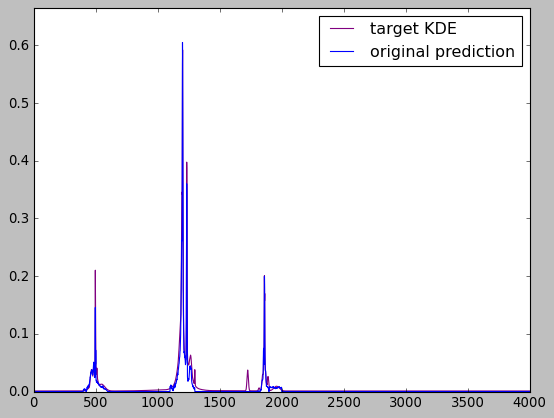

event = 0
 
 ------------------------------- 
 


In [16]:
plt.figure()
plt.plot(event_label,color='purple',label='target KDE')
plt.plot(event_original_output,color='blue',label='original prediction')
# Add the Python model's predictions to the plot
#plt.plot(event_python_output, color='red', label='Python prediction')
ymax = max(1.1*np.max(event_label), 1.1*np.max(event_python_output), 1.1*np.max(event_original_output))
plt.ylim((0., ymax))
plt.legend()
plt.show()

print("event =", jj)
print(' ')
print(' ------------------------------- ')
print(' ')


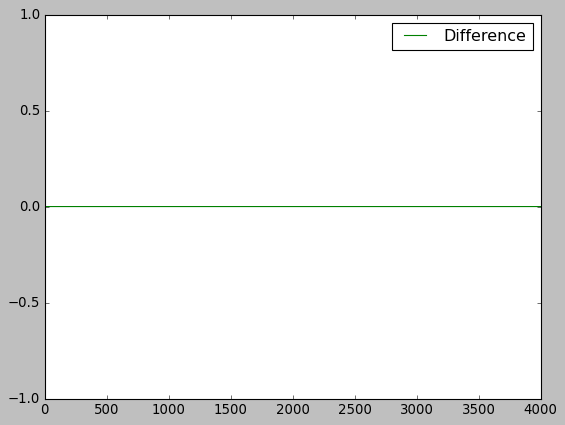

In [17]:
# Calculate the difference between the Python and PyTorch predictions
difference = event_python_output - event_original_output

plt.figure()
plt.plot(difference, color='green', label='Difference')
# Add a small buffer to the y-axis limits
ylim = np.max(np.abs(difference))
if ylim == 0:
    ylim = 1  # Or any other small number
plt.ylim((-ylim, ylim))
plt.legend()
plt.show()


## try with 10 events

data shape = torch.Size([100000, 9, 250])


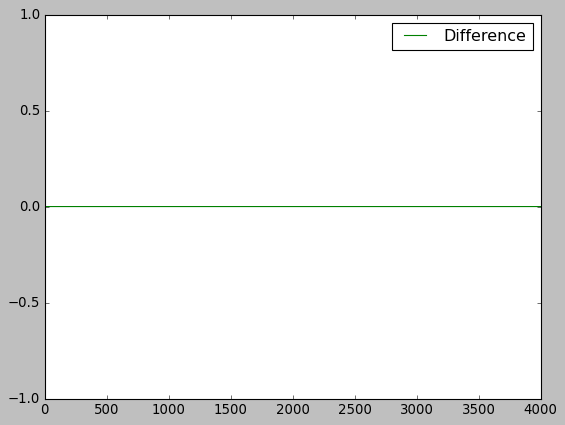

event = 0
 
 ------------------------------- 
 


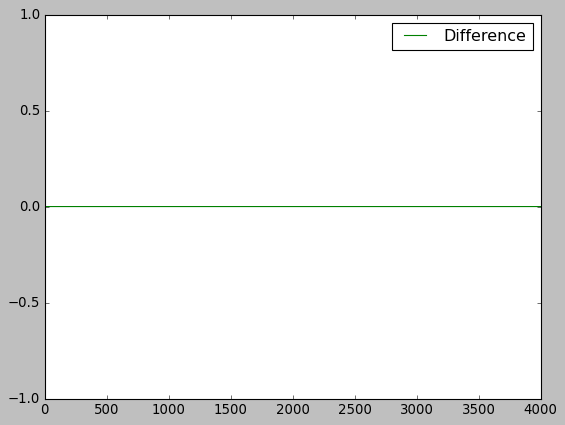

event = 1
 
 ------------------------------- 
 


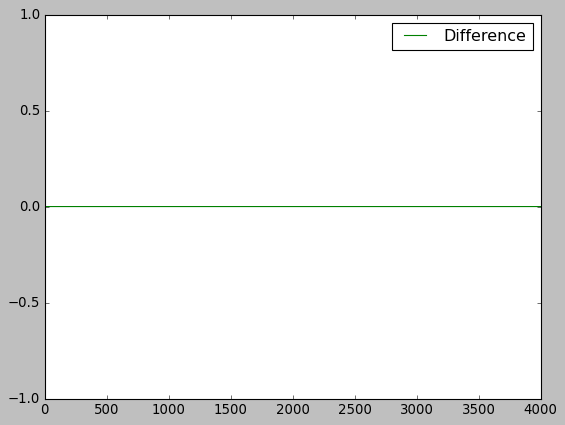

event = 2
 
 ------------------------------- 
 


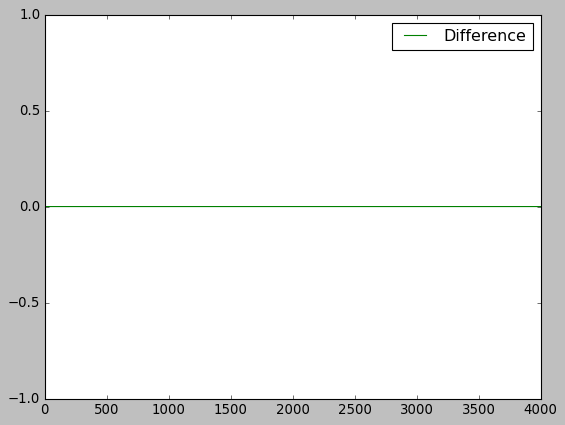

event = 3
 
 ------------------------------- 
 


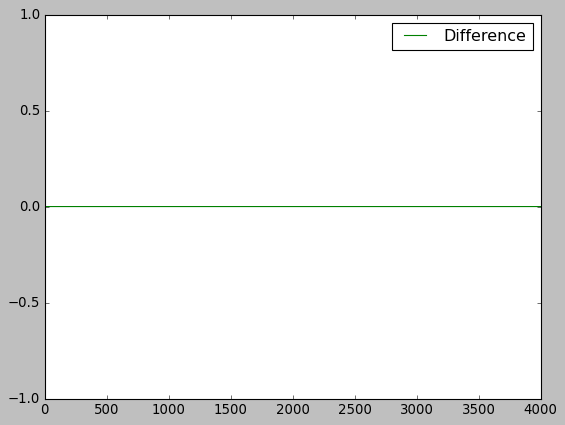

event = 4
 
 ------------------------------- 
 


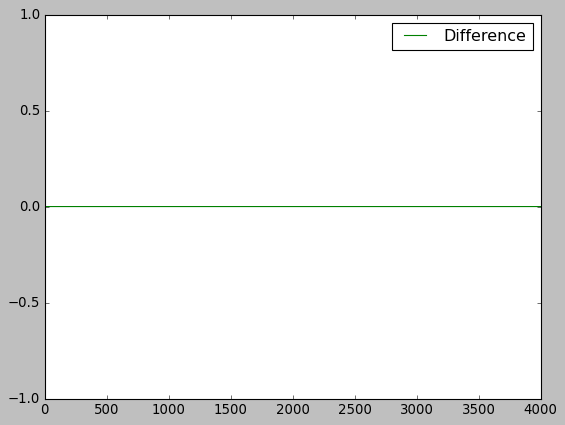

event = 5
 
 ------------------------------- 
 


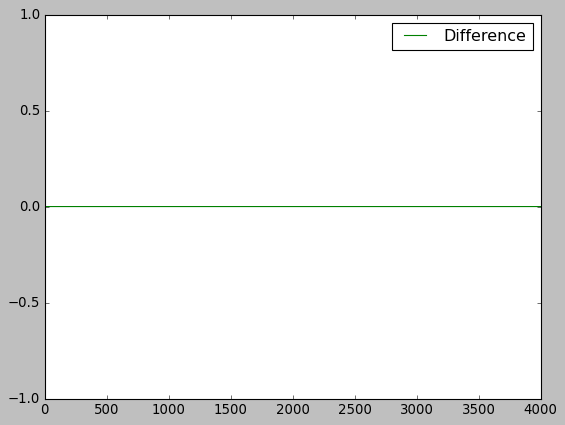

event = 6
 
 ------------------------------- 
 


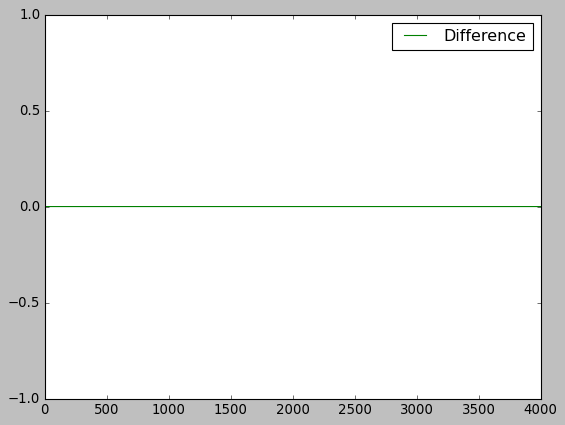

event = 7
 
 ------------------------------- 
 


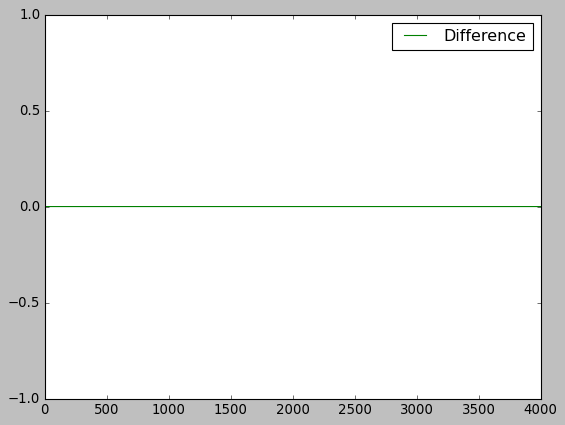

event = 8
 
 ------------------------------- 
 


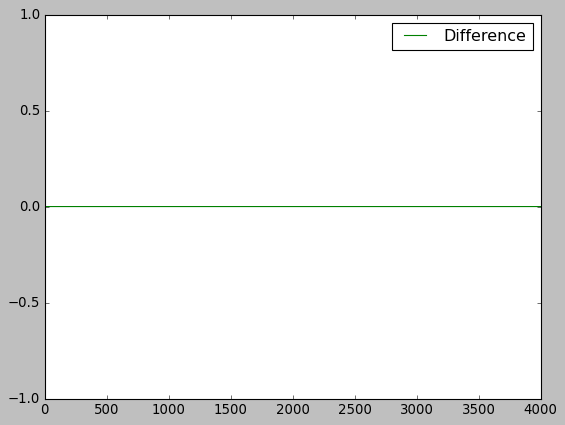

event = 9
 
 ------------------------------- 
 


In [19]:
# Load the weights into the Python model
python_model = PythonModel(d_original, nOut1, nOut2, nOut3, nOut4, nOut5)

with torch.no_grad():
    for iChunk in range(1):
       print("data shape =", vdt0Split[iChunk].shape) 
       original_outputs_python_based = python_model.forward(vdt0Split[iChunk].numpy())
        
       # Convert the PyTorch tensor to a NumPy array for the Python model
       inputs_python = vdt0Split[iChunk].numpy()
        
       labels = vdt1Split[iChunk].numpy()
       inputs = vdt0Split[iChunk].numpy()

       # Use the Python model to make predictions
       python_outputs = python_model.forward(inputs_python)
       
num_intervals_per_event=40
listOfEvents = np.arange(10)
for jj in listOfEvents:
   event_labels=[]
   event_original_outputs=[]
   event_python_outputs=[]

   for i in range(num_intervals_per_event):

      interval=jj*num_intervals_per_event+i
      
      if interval>=len(inputs): break 

      input=inputs[interval]
      label=labels[interval]
      
      original_output_python_based=original_outputs_python_based[interval]
      
      # Get the corresponding output from the Python model
      python_output = python_outputs[interval]

      
      event_labels.append(label)
      
      event_original_outputs.append(original_output_python_based)
      
      # Add the Python output to the list
      event_python_outputs.append(python_output)

   
   event_label=np.concatenate(event_labels)

   event_original_output=np.concatenate(event_original_outputs)

   # Concatenate the Python outputs
   event_python_output = np.concatenate(event_python_outputs)

   # Calculate the difference between the Python and PyTorch predictions
   difference = event_python_output - event_original_output

   plt.figure()
   plt.plot(difference, color='green', label='Difference')
   # Add a small buffer to the y-axis limits
   ylim = np.max(np.abs(difference))
   if ylim == 0:
       ylim = 1  # Or any other small number
   plt.ylim((-ylim, ylim))
   plt.legend()
   plt.show()

   print("event =", jj)
   print(' ')
   print(' ------------------------------- ')
   print(' ')


## Subplot visualization of the models

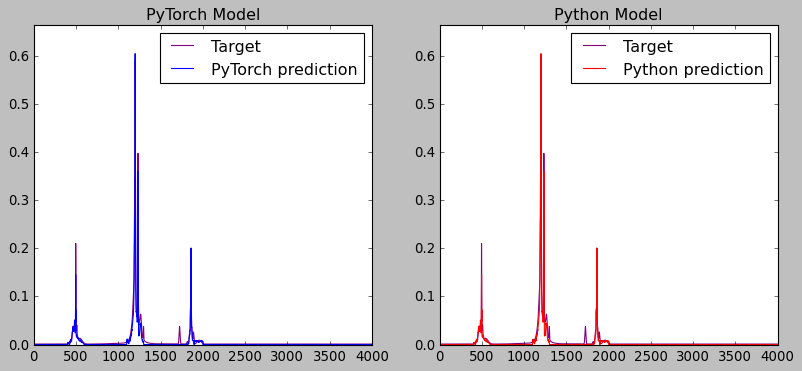

event = 0
 
 ------------------------------- 
 


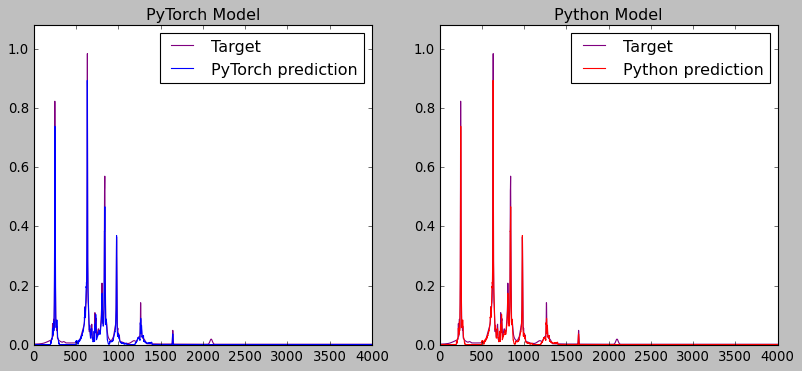

event = 1
 
 ------------------------------- 
 


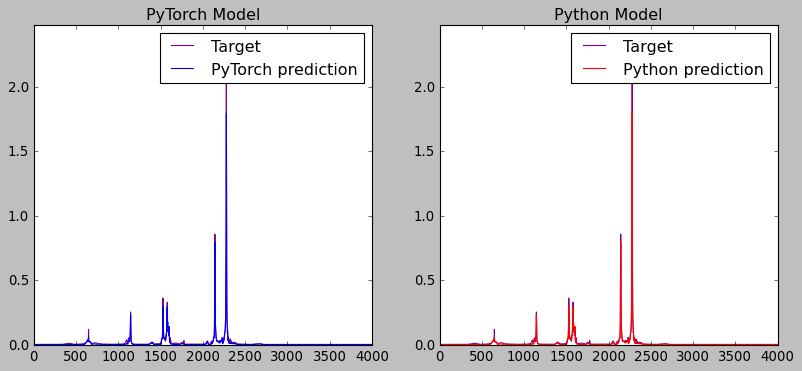

event = 2
 
 ------------------------------- 
 


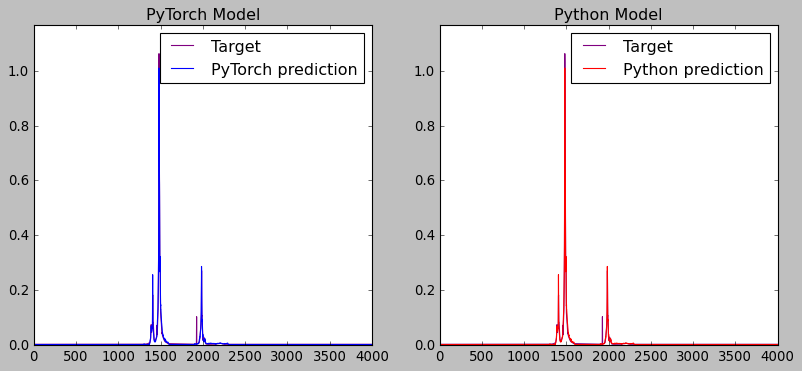

event = 3
 
 ------------------------------- 
 


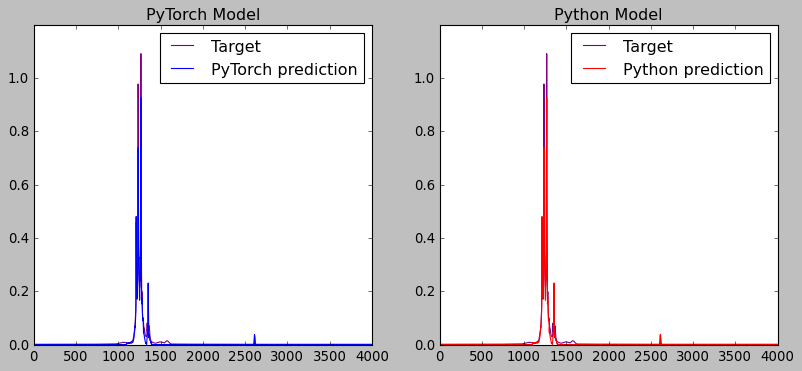

event = 4
 
 ------------------------------- 
 


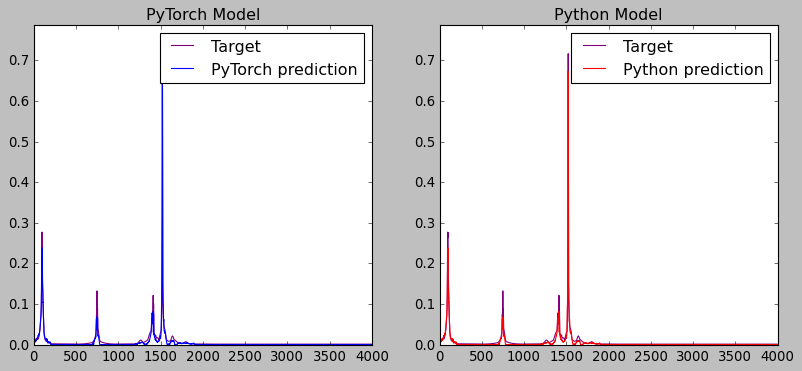

event = 5
 
 ------------------------------- 
 


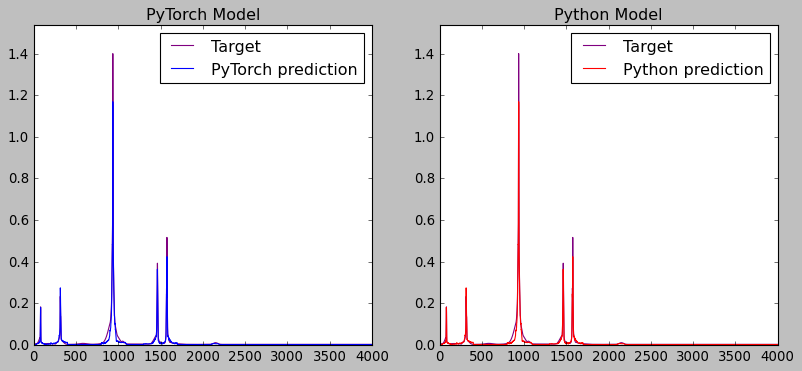

event = 6
 
 ------------------------------- 
 


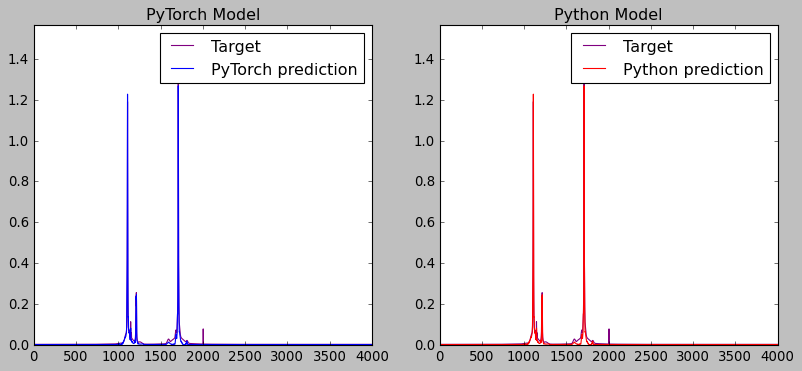

event = 7
 
 ------------------------------- 
 


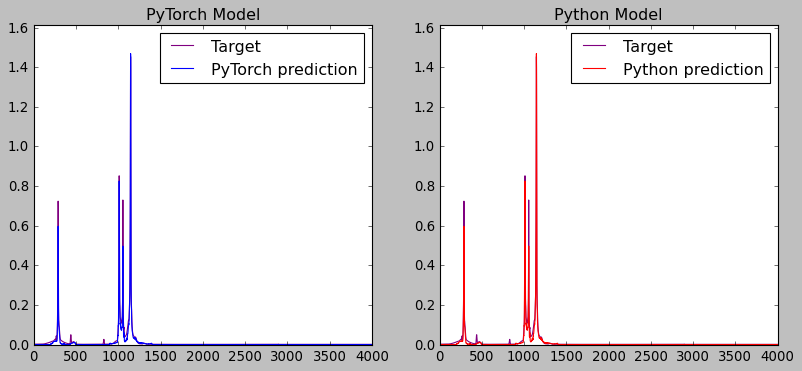

event = 8
 
 ------------------------------- 
 


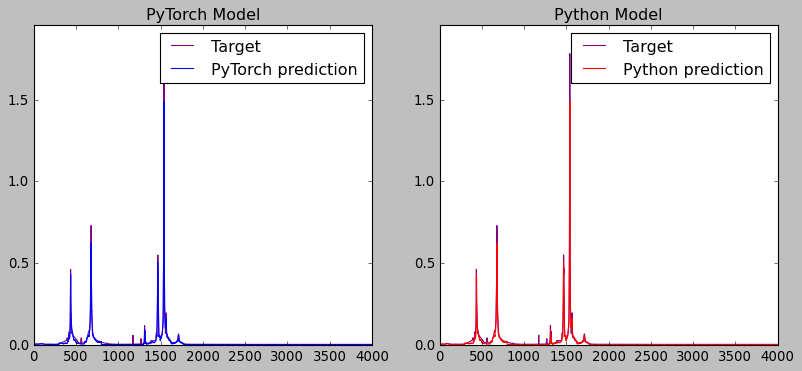

event = 9
 
 ------------------------------- 
 


In [20]:
num_intervals_per_event=40
listOfEvents = np.arange(10)
for jj in listOfEvents:
   event_labels=[]
   event_original_outputs=[]
   event_python_outputs=[]

   for i in range(num_intervals_per_event):

      interval=jj*num_intervals_per_event+i
      
      if interval>=len(inputs): break 

      input=inputs[interval]
      label=labels[interval]
      
      original_output_python_based=original_outputs_python_based[interval]
      
      # Get the corresponding output from the Python model
      python_output = python_outputs[interval]

      
      event_labels.append(label)
      
      event_original_outputs.append(original_output_python_based)
      
      # Add the Python output to the list
      event_python_outputs.append(python_output)

   
   event_label=np.concatenate(event_labels)

   event_original_output=np.concatenate(event_original_outputs)

   # Concatenate the Python outputs
   event_python_output = np.concatenate(event_python_outputs)

   # Create a figure with two subplots
   fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

   # Plot the target and PyTorch predictions on the first subplot
   ax1.plot(event_label, color='purple', label='Target')
   ax1.plot(event_original_output, color='blue', label='PyTorch prediction')
   ax1.set_ylim((0., max(1.1*np.max(event_label), 1.1*np.max(event_original_output))))
   ax1.legend()
   ax1.set_title('PyTorch Model')

   # Plot the target and Python predictions on the second subplot
   ax2.plot(event_label, color='purple', label='Target')
   ax2.plot(event_python_output, color='red', label='Python prediction')
   ax2.set_ylim((0., max(1.1*np.max(event_label), 1.1*np.max(event_python_output))))
   ax2.legend()
   ax2.set_title('Python Model')

   plt.show()

   print("event =", jj)
   print(' ')
   print(' ------------------------------- ')
   print(' ')


jj =  0
inputs.shape =  (100000, 9, 250)
 interval =  4    ymax =  3.5


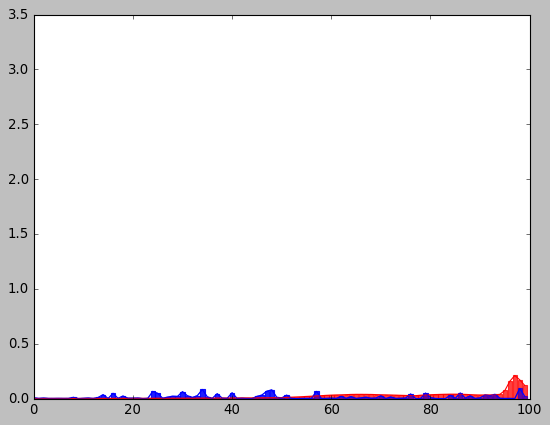

 interval =  11    ymax =  3.5


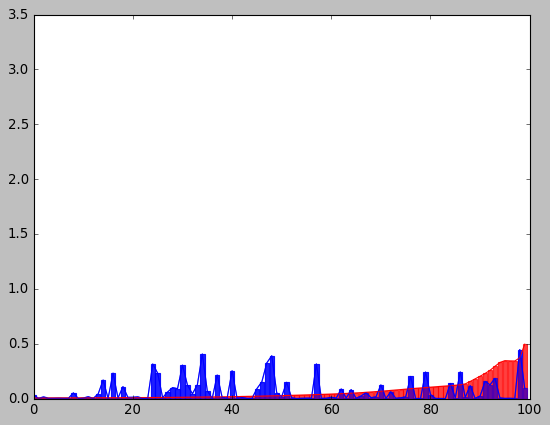

 interval =  12    ymax =  3.5


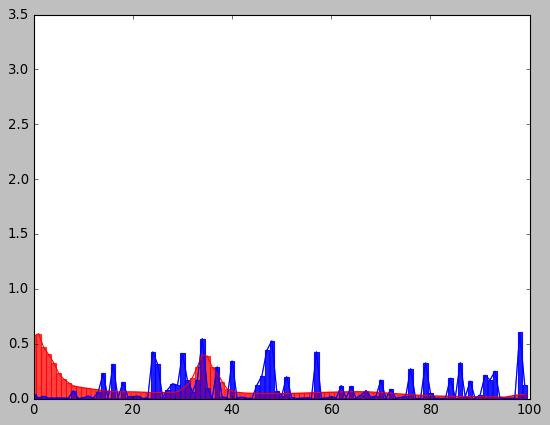

 interval =  18    ymax =  3.5


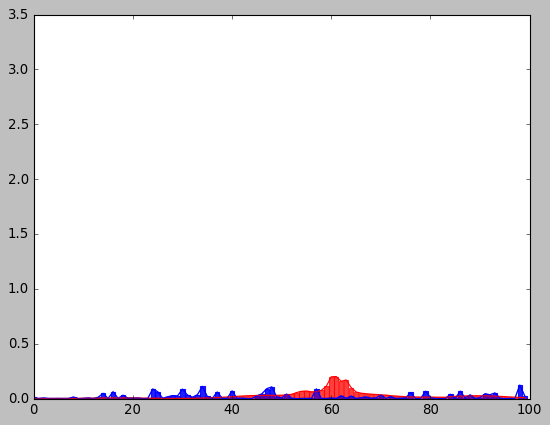

  
 ---- 
 
true PV positions (in mm)        =  ['-51.46', '-46.83', '19.16', '23.50', '27.19', '86.05']
predicted PV positions (in mm)   =  ['12.49', '13.06', '14.82', '19.88', '22.52', '23.09', '23.46', '24.82', '28.72', '29.25', '29.87']
predicted_reso (in mm)           =  ['0.029', '0.779', '0.143', '0.035', '0.036', '0.718', '1.250', '0.144', '1.590', '0.096', '0.015']
target_reso (in mm)              =  ['0.029', '0.029', '0.029', '0.029', '0.029', '0.029']
  --> Found, Missed, FalsePositive =   3 3 8
event number =  0     event_ave_chisq =  14.269768414020515


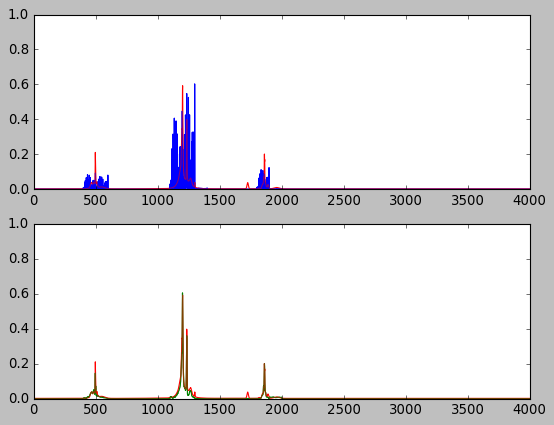

jj =  1
inputs.shape =  (100000, 9, 250)
 interval =  42    ymax =  3.5


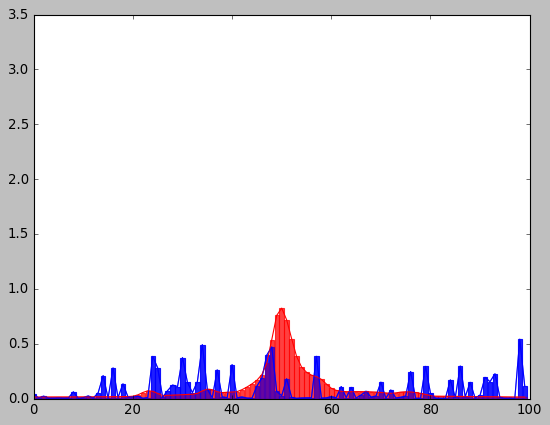

 interval =  46    ymax =  3.5


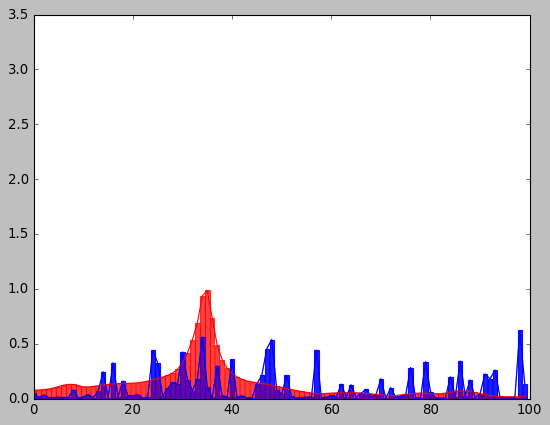

 interval =  47    ymax =  3.5


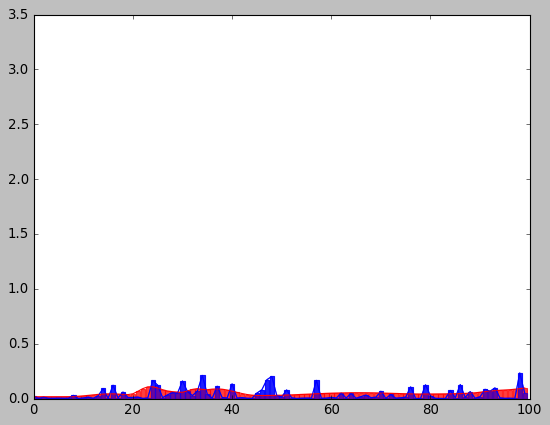

 interval =  48    ymax =  3.5


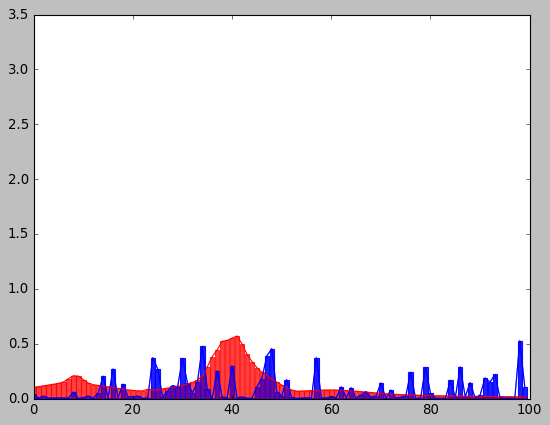

 interval =  49    ymax =  3.5


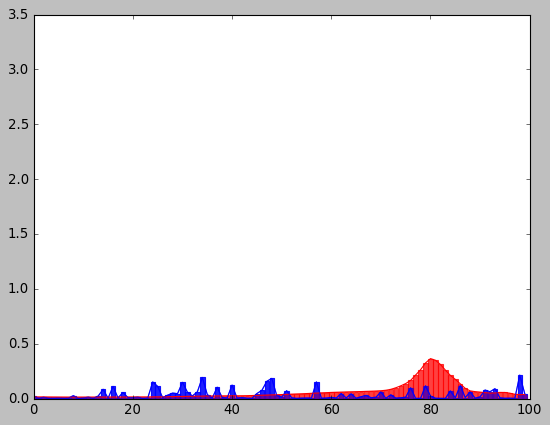

 interval =  50    ymax =  3.5


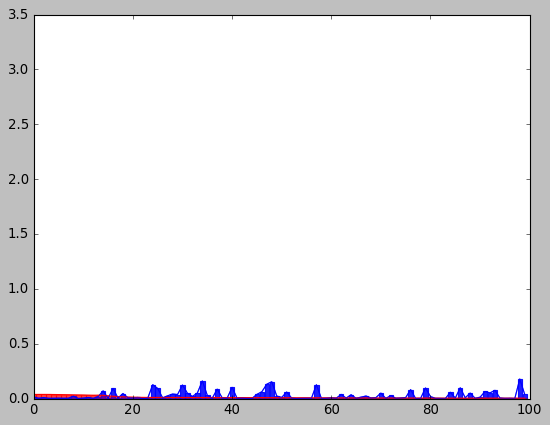

 interval =  52    ymax =  3.5


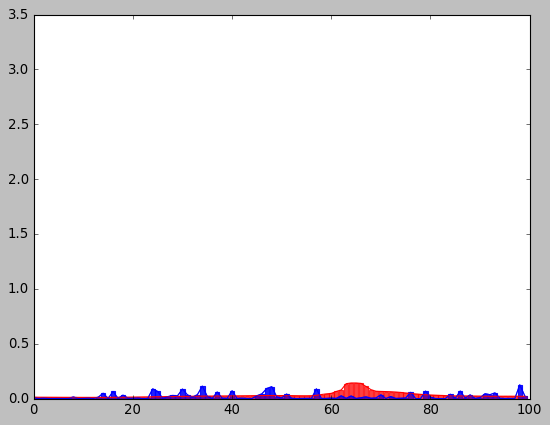

  
 ---- 
 
true PV positions (in mm)        =  ['-75.57', '-71.67', '-37.88', '-20.67', '-5.45', '0.72', '25.53']
predicted PV positions (in mm)   =  ['-77.48', '-76.91', '-76.53', '-75.18', '-70.75', '-70.13', '-38.28', '-37.48', '-36.91', '-36.44', '-35.18', '-31.42', '-30.75', '-30.13', '-25.18', '-17.48', '-16.91', '-16.53', '-15.18', '-10.76', '-10.13', '-5.18']
predicted_reso (in mm)           =  ['0.038', '0.724', '1.261', '0.148', '0.101', '0.015', '0.015', '0.041', '0.732', '3.991', '0.155', '0.155', '0.116', '0.023', '0.154', '0.037', '0.723', '1.258', '0.146', '0.100', '0.023', '0.156']
target_reso (in mm)              =  ['0.029', '0.029', '0.029', '0.029', '0.029', '0.029', '0.029']
  --> Found, Missed, FalsePositive =   5 2 17
event number =  1     event_ave_chisq =  31.101346770942246


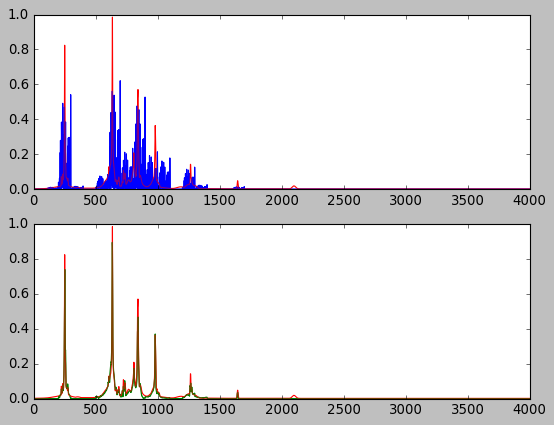

jj =  2
inputs.shape =  (100000, 9, 250)
 interval =  86    ymax =  3.5


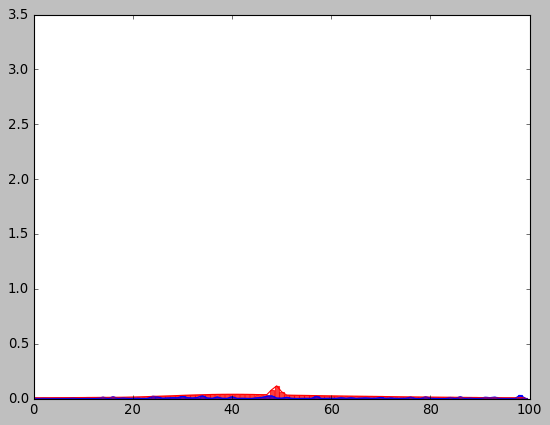

 interval =  91    ymax =  3.5


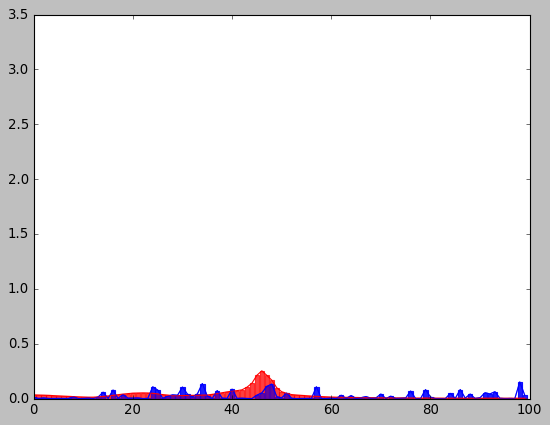

 interval =  95    ymax =  3.5


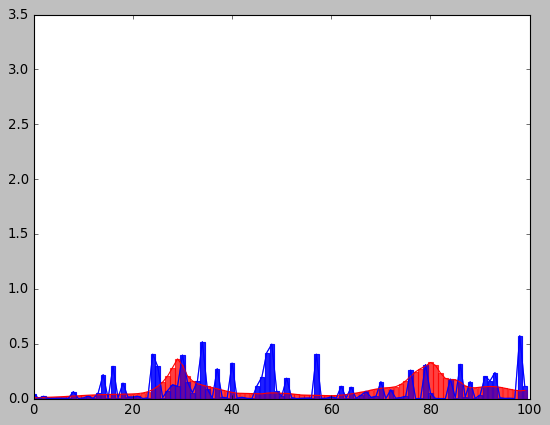

 interval =  96    ymax =  3.5


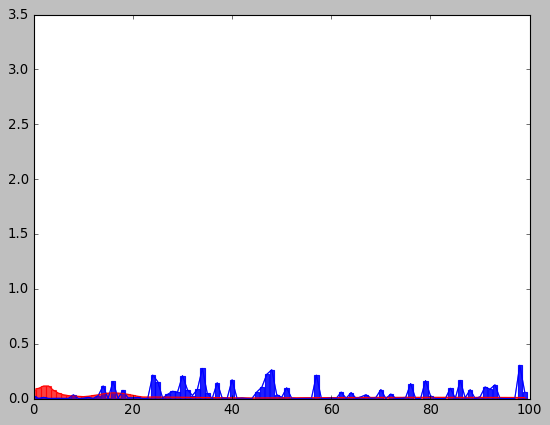

 interval =  101    ymax =  3.5


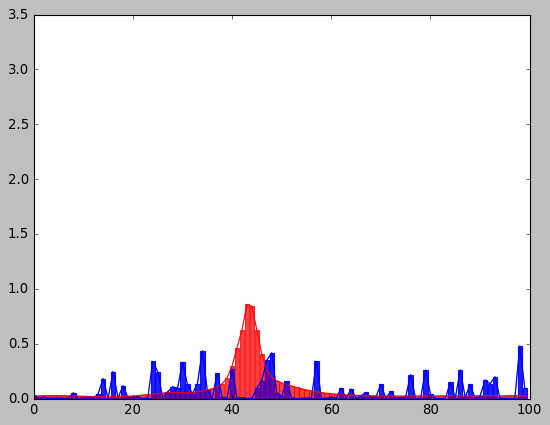

 interval =  102    ymax =  3.5


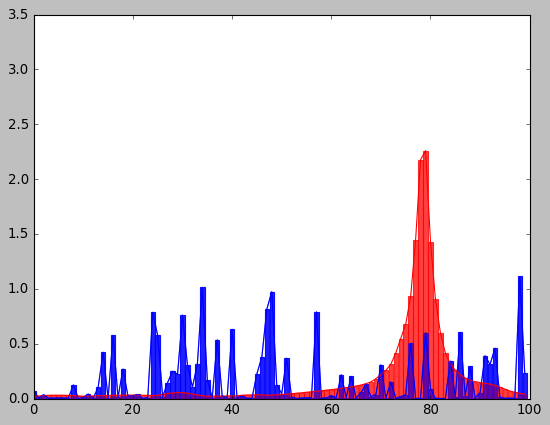

 interval =  103    ymax =  3.5


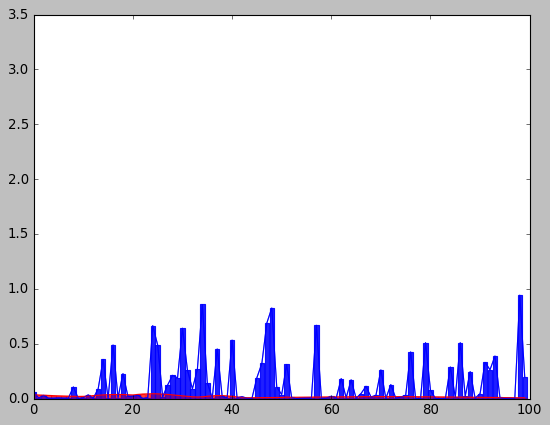

  
 ---- 
 
true PV positions (in mm)        =  ['-35.15', '-27.06', '13.15', '39.89', '52.94', '57.45', '60.12', '105.24', '114.21', '127.13', '132.53', '137.14']
predicted PV positions (in mm)   =  ['52.49', '53.06', '53.46', '54.82', '59.25', '59.87', '63.06', '64.82', '112.49', '113.06', '113.46', '114.82', '119.25', '119.89', '121.43', '121.71', '122.52', '123.09', '123.46', '123.75', '124.82', '127.64', '127.96', '128.58', '129.25', '129.87', '132.52', '133.09', '133.46', '134.82', '137.96', '138.58', '139.25', '139.87']
predicted_reso (in mm)           =  ['0.029', '0.777', '1.237', '0.141', '0.095', '0.023', '0.776', '0.141', '0.029', '0.777', '1.239', '0.142', '0.094', '0.050', '0.018', '0.527', '0.035', '0.715', '1.240', '0.005', '0.142', '0.007', '0.012', '2.400', '0.093', '0.027', '0.035', '0.715', '1.240', '0.142', '0.012', '2.405', '0.093', '0.014']
target_reso (in mm)              =  ['0.029', '0.029', '0.029', '0.029', '0.029', '0.029', '0.029', '0.029', '2.727', '2.727

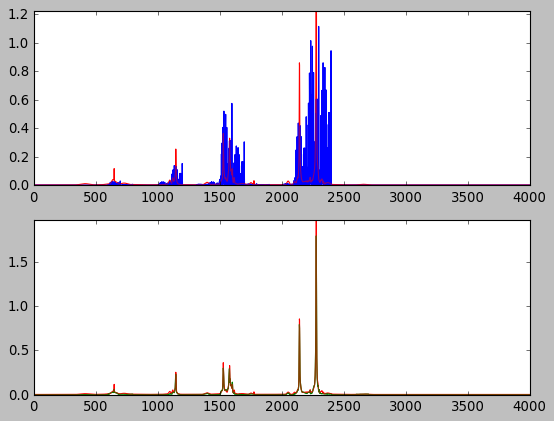

jj =  3
inputs.shape =  (100000, 9, 250)
 interval =  133    ymax =  3.5


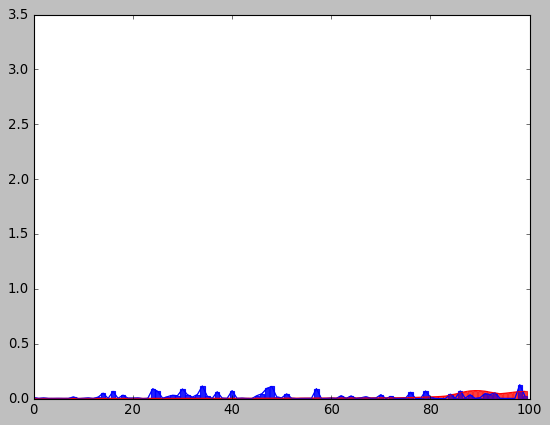

 interval =  134    ymax =  3.5


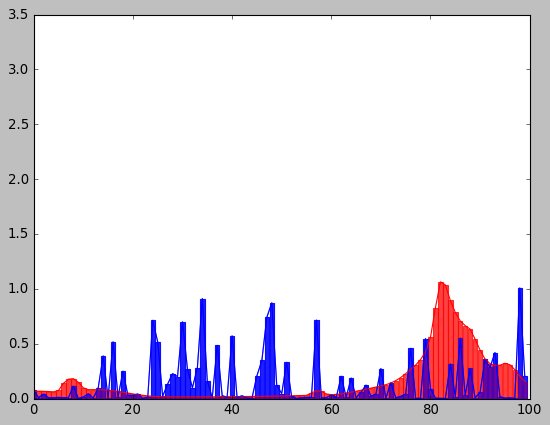

 interval =  135    ymax =  3.5


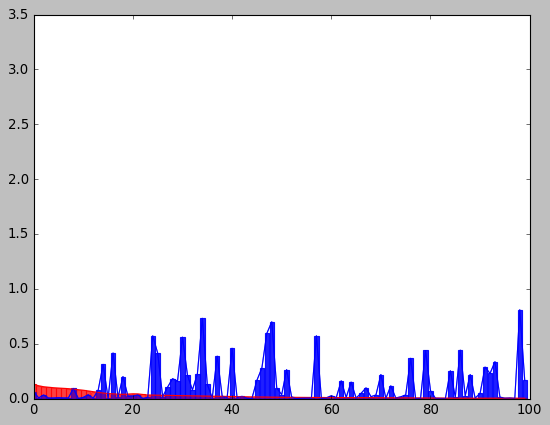

 interval =  139    ymax =  3.5


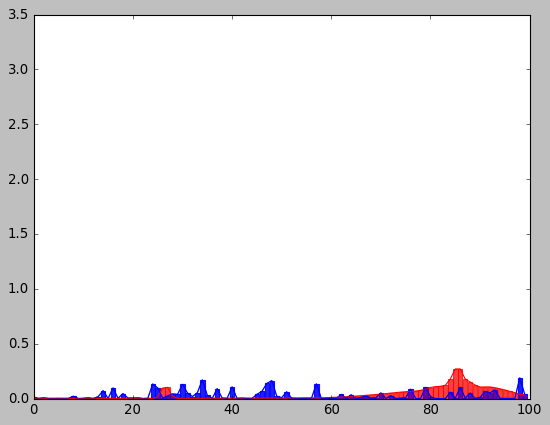

 interval =  140    ymax =  3.5


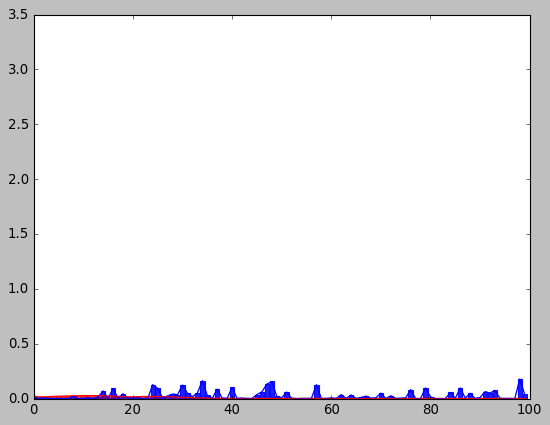

  
 ---- 
 
true PV positions (in mm)        =  ['40.01', '47.80', '50.31', '53.42', '98.20', '100.55']
predicted PV positions (in mm)   =  ['41.72', '42.52', '43.09', '43.47', '43.91', '44.82', '45.75', '47.63', '47.96', '48.58', '49.25', '49.88', '51.72', '52.52', '53.09', '53.46', '54.82', '57.96', '58.58', '59.25', '59.87']
predicted_reso (in mm)           =  ['0.029', '0.036', '0.722', '1.254', '1.254', '0.145', '0.002', '0.009', '0.015', '2.418', '0.099', '0.029', '0.567', '0.036', '0.722', '1.252', '0.144', '0.014', '2.417', '0.098', '0.014']
target_reso (in mm)              =  ['0.029', '0.029', '0.029', '0.029', '0.029', '0.029']
  --> Found, Missed, FalsePositive =   4 2 17
event number =  3     event_ave_chisq =  43.51695125079157


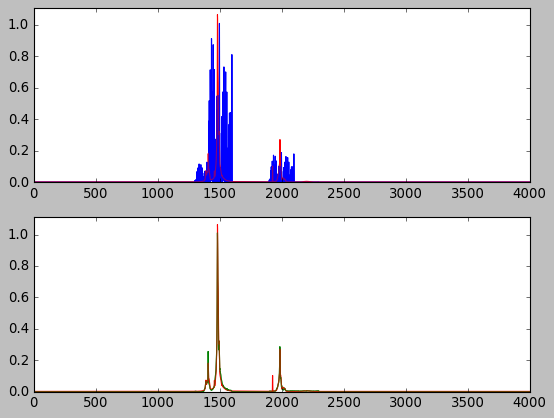

jj =  4
inputs.shape =  (100000, 9, 250)
 interval =  171    ymax =  3.5


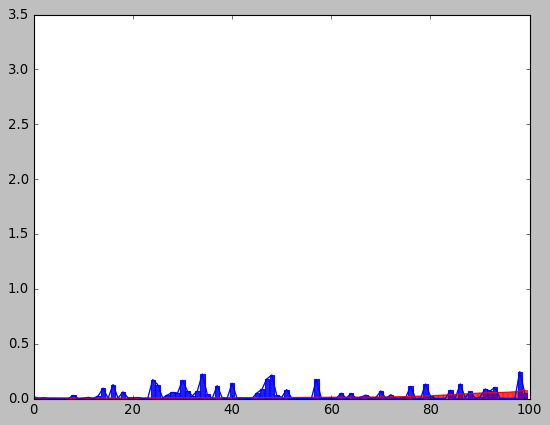

 interval =  172    ymax =  3.5


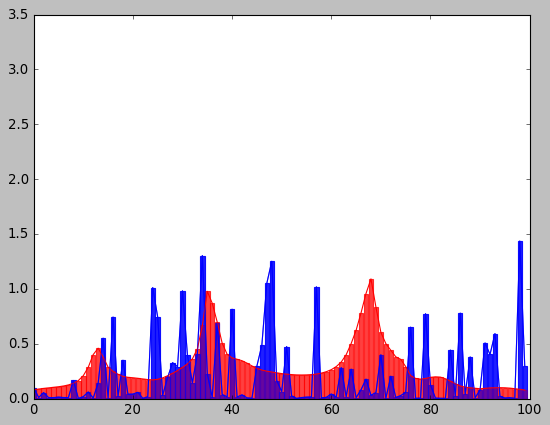

 interval =  173    ymax =  3.5


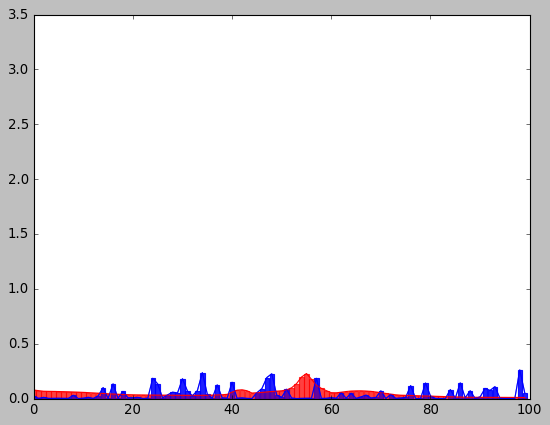

  
 ---- 
 
true PV positions (in mm)        =  ['20.82', '23.95', '26.80', '31.77', '37.37', '57.65']
predicted PV positions (in mm)   =  ['14.82', '21.43', '21.71', '22.52', '23.09', '23.55', '24.04', '24.82', '25.75', '26.32', '27.64', '27.96', '28.58', '29.25', '29.87', '34.82']
predicted_reso (in mm)           =  ['0.147', '0.019', '0.559', '0.036', '0.718', '4.571', '0.004', '0.145', '0.002', '0.002', '0.008', '0.014', '2.416', '0.097', '0.018', '0.144']
target_reso (in mm)              =  ['0.029', '0.029', '0.029', '0.029', '0.029', '0.029']
  --> Found, Missed, FalsePositive =   4 2 12
event number =  4     event_ave_chisq =  42.384749357104326


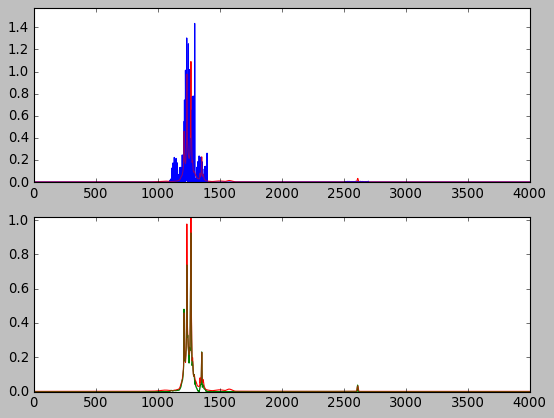

In [21]:
model = Model(nOut1,nOut2,nOut3,nOut4,nOut5)

outputs = model(vdt0Split[iChunk]).detach().cpu().numpy()

# Load the weights into the Python model
python_model = PythonModel(d_original, nOut1, nOut2, nOut3, nOut4, nOut5)

# Use the Python model to make predictions
python_outputs = python_model.forward(vdt0Split[iChunk].numpy())

listOfEvents = np.arange(5)
for jj in listOfEvents:

    event_label  = np.asarray([])
    event_output = np.asarray([])
    event_python_output = np.asarray([])  # Python model output
    print("jj = ",jj)
    print("inputs.shape = ",inputs.shape)
    event_chisq = 0.
    for interval in range(jj*40,jj*40+40):
        input = inputs[interval]
        label = np.asarray(labels[interval])
        output = np.asarray(outputs[interval])
        python_output = np.asarray(python_outputs[interval])  # Python model output
        
        nFeatures = len(label)
        
        sigma = 0.01
        diff = np.subtract(output,label)
        diffS = diff/sigma
        chisq = np.power(diffS,2)
        nanMask = np.isnan(label)
        countGoods = np.count_nonzero(~np.isnan(label))
        chisq_to_sum = ma.array(chisq,mask=nanMask)                           
        local_ave_chisq = chisq_to_sum.sum()/countGoods
        event_chisq += local_ave_chisq

        
        ymax = max(np.max(label),np.max(output))
        if (np.isnan(ymax)):
            ymax = 0.5
        if (ymax>0.1):
            ymax = max(1.15*ymax,3.5)
            print(" interval = ",interval,"   ymax = ", ymax)
            myMask = np.zeros(100)
            masker = np.isnan(label)
            myMask = np.ma.array(myMask,mask=masker)
            myMask = myMask.filled(fill_value = 2.0)
            plt.figure()
            plt.plot(output)
            plt.plot(label, color='r')
            plt.bar(np.arange(100),height=myMask,width=0.9,color='lightgrey',edgecolor='lightgrey',alpha=1.0)
            plt.plot(output, color='blue',alpha=0.50)
            plt.bar(np.arange(100),height=output,width=0.9,color='blue',edgecolor='blue',alpha=0.75)
            plt.bar(np.arange(100),height=label,width=0.9,color='red',edgecolor='red',alpha=0.75)
            plt.bar(np.arange(100),height=output,width=0.9,color='blue',edgecolor='blue',alpha=0.5)
            plt.xlim(0.,100.)
            plt.ylim((0.,ymax))
            plt.show()
        
        event_label  = np.concatenate((event_label,label))
        event_output = np.concatenate((event_output,output))
        event_python_output = np.concatenate((event_python_output,python_output))  # Python model output

    bin_threshold      = 0.01
    integral_threshold = 0.50
    min_width          = 2
    label32 = np.float32(event_label)
    true_pvs = pv_locations_res(label32,threshold=bin_threshold,integral_threshold=integral_threshold,min_width=min_width)
    predicted_pvs = pv_locations_res(event_output,threshold=bin_threshold,integral_threshold=integral_threshold,min_width=min_width)
    true_pvs_updated = pv_locations_updated_res(event_label,threshold=bin_threshold,integral_threshold=integral_threshold,min_width=min_width)
    predicted_pvs_updated = pv_locations_updated_res(event_output,threshold=bin_threshold,integral_threshold=integral_threshold,min_width=min_width)
    filtered_predicted_pvs = filter_nans_res(predicted_pvs,event_label)
    filtered_predicted_updated_pvs =  filter_nans_res(predicted_pvs_updated,event_label)
    
    print("  ")
    print(" ---- ")
    print(" ")

    
    predicted_reso = get_reco_resolution(filtered_predicted_updated_pvs,event_output,1.0,steps_extrapolation=1,ratio_max=0.1,debug=False)
    target_reso = get_reco_resolution(true_pvs_updated,event_label,1.0,steps_extrapolation=1,ratio_max=0.1,debug=False)
    print("true PV positions (in mm)        = ",[ "{:0.2f}".format(0.1*x-100.) for x in  true_pvs_updated])
    print("predicted PV positions (in mm)   = ",[ "{:0.2f}".format(0.1*x-100.) for x in filtered_predicted_updated_pvs])
    print("predicted_reso (in mm)           = ",[ "{:0.3f}".format(0.1*x) for x in predicted_reso])
    print("target_reso (in mm)              = ",[ "{:0.3f}".format(0.1*x) for x in target_reso])
    
    
    reco_window = 5*predicted_reso
    Found, Missed, FalsePositive = compare_res_reco(true_pvs_updated,filtered_predicted_updated_pvs,reco_window,debug=False)
    print("  --> Found, Missed, FalsePositive =  ",Found, Missed, FalsePositive)
    event_ave_chisq = event_chisq/40
    print("event number = ",jj,"    event_ave_chisq = ",event_ave_chisq)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(event_output)
    plt.plot(event_label, color='r')
    plt.plot(event_output, color='blue',alpha=0.50)
    ymax = max(1.1*np.max(event_label),1.0)
    ymax = max(1.1*np.max(event_output),1.0)
    if (np.isnan(ymax)):
        ymax = 3.5
    plt.ylim((0.,ymax))

    plt.subplot(2, 1, 2)
    plt.plot(event_python_output, color='green')  # Python model output
    plt.plot(event_label, color='r')
    plt.plot(event_python_output, color='green',alpha=0.50)  # Python model output
    ymax = max(1.1*np.max(event_label),1.0)
    ymax = max(1.1*np.max(event_python_output),1.0)  # Python model output
    if (np.isnan(ymax)):
        ymax = 3.5
    plt.ylim((0.,ymax))

    plt.show()
